In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('flipkart_fashion_products_dataset.json')

In [3]:
# removing unwanted columns
cols_to_delete = ['_id', 'pid', 'url','images']
df.drop(cols_to_delete, axis=1, inplace=True)
df.head()

,actual_price,average_rating,brand,category,crawled_at,description,discount,out_of_stock,product_details,seller,selling_price,sub_category,title
0,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,False,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants
1,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,False,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants
2,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,False,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants
3,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,False,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants
4,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,False,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants"


In [4]:
df['actual_price']

0        2,999
1        1,499
2        2,999
3        2,999
4        2,999
         ...  
29995    2,299
29996      799
29997    4,999
29998    3,125
29999    3,125
Name: actual_price, Length: 30000, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   actual_price     30000 non-null  object        
 1   average_rating   30000 non-null  object        
 2   brand            30000 non-null  object        
 3   category         30000 non-null  object        
 4   crawled_at       30000 non-null  datetime64[ns]
 5   description      30000 non-null  object        
 6   discount         30000 non-null  object        
 7   out_of_stock     30000 non-null  bool          
 8   product_details  30000 non-null  object        
 9   seller           30000 non-null  object        
 10  selling_price    30000 non-null  object        
 11  sub_category     30000 non-null  object        
 12  title            30000 non-null  object        
dtypes: bool(1), datetime64[ns](1), object(11)
memory usage: 2.8+ MB


In [18]:
df.describe()

,actual_price,crawled_at
count,29137.000000,30000
mean,1472.617703,2021-02-10 22:55:06.673900032
min,150.000000,2021-02-10 20:11:51
25%,865.000000,2021-02-10 21:31:38
50%,1249.000000,2021-02-10 23:01:10
75%,1799.000000,2021-02-11 00:16:29
max,12999.000000,2021-02-11 01:31:55
std,963.263221,NaN


In [21]:
def clean_price(price):
    if price is None:
        return np.nan
    elif isinstance(price, str):
        price = price.replace(',', '')
        if price:
            price = float(price)
        else:
            price = np.nan
        return price
    else:
        return price


df['actual_price'] = df['actual_price'].apply(clean_price)

<Axes: ylabel='Frequency'>

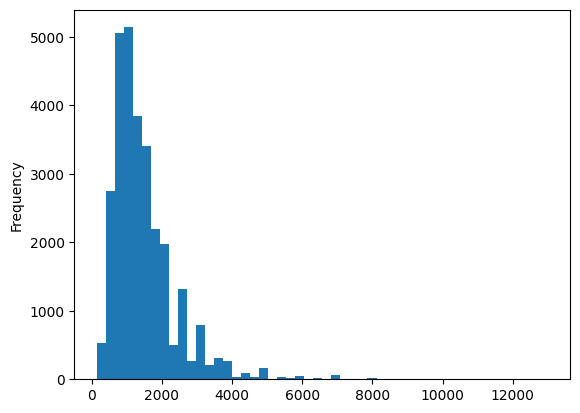

In [22]:
df['actual_price'].plot.hist(bins=50)

In [23]:
df.head()

,actual_price,average_rating,brand,category,crawled_at,description,discount,out_of_stock,product_details,seller,selling_price,sub_category,title
0,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,False,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants
1,1499.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,False,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants
2,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,False,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants
3,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,False,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants
4,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,False,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants"
